In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
# Załadowanie danych
data = pd.read_csv('phishing.csv')

# Sprawdzenie pierwszych kilku wierszy
print(data.head())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Rozdzielenie cech (X) i etykiet (y)
X = data.drop('class', axis=1)  # 'label' to kolumna z klasą (phishing lub nie-phishing)
y = data['class']

   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()

# Dopasowanie skalera do danych treningowych i przekształcenie danych treningowych
X_train = scaler.fit_transform(X_train)

# Przekształcenie danych testowych na tej samej skali
X_test = scaler.transform(X_test)

In [5]:
# Budowanie modelu
model = Sequential()

# Warstwa wejściowa (dopasowana do liczby cech w X_train)
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Kilka warstw ukrytych
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Warstwa wyjściowa z aktywacją sigmoid dla klasyfikacji binarnej
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
222/222 [==============================] - 1s 3ms/step - loss: -708.4423 - accuracy: 0.2819 - val_loss: -4342.6724 - val_accuracy: 0.3810
Epoch 2/20
222/222 [==============================] - 1s 2ms/step - loss: -34897.2266 - accuracy: 0.3811 - val_loss: -100228.9141 - val_accuracy: 0.3951
Epoch 3/20
222/222 [==============================] - 1s 2ms/step - loss: -273397.4688 - accuracy: 0.3889 - val_loss: -549552.5000 - val_accuracy: 0.3985
Epoch 4/20
222/222 [==============================] - 1s 3ms/step - loss: -1047254.5000 - accuracy: 0.3906 - val_loss: -1750124.2500 - val_accuracy: 0.4036
Epoch 5/20
222/222 [==============================] - 1s 2ms/step - loss: -2776212.7500 - accuracy: 0.3928 - val_loss: -4158157.0000 - val_accuracy: 0.4036
Epoch 6/20
222/222 [==============================] - 1s 3ms/step - loss: -5958043.5000 - accuracy: 0.3923 - val_loss: -8312837.0000 - val_accuracy: 0.4053
Epoch 7/20
222/222 [==============================] - 1s 3ms/step - loss: -1

In [7]:
# Ewaluacja modelu na danych testowych
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

70/70 [==============================] - 0s 1ms/step - loss: -492556384.0000 - accuracy: 0.3976
Test accuracy: 0.3976


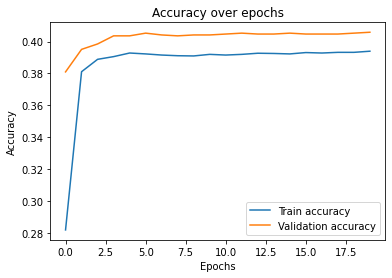

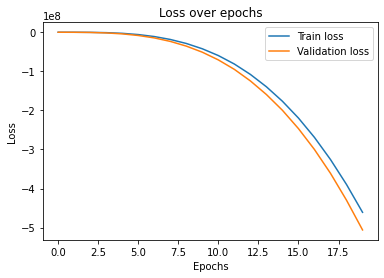

In [8]:
# Wykres strat i dokładności
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

70/70 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       976
           0       0.00      0.00      0.00         0
           1       0.98      0.71      0.82      1235

    accuracy                           0.40      2211
   macro avg       0.33      0.24      0.27      2211
weighted avg       0.55      0.40      0.46      2211



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/pyth

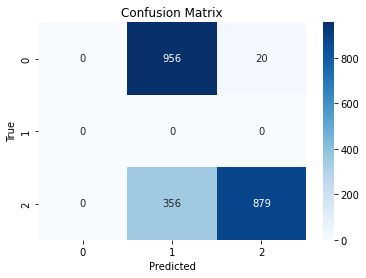

In [9]:
# Predykcje na zbiorze testowym
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)

# Wyświetlenie macierzy
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Raport klasyfikacji
print(classification_report(y_test, y_pred))

70/70 [==============================] - 0s 1ms/step


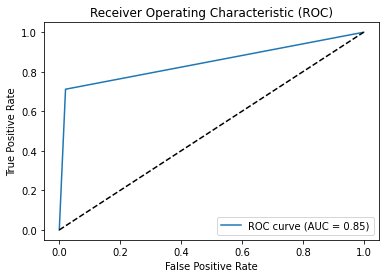

In [10]:
# Obliczanie wyników prawdopodobieństwa
y_pred_prob = model.predict(X_test)

# Wykres ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Wyświetlanie wykresu ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # wykres linii losowej
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()